In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, date

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv(r"data.xlsx - Sheet1.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.shape


(3998, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [5]:
df.dtypes  # check the dtypes of each columns
df.dtypes.value_counts()

,0
Unnamed: 0,object
ID,int64
Salary,float64
DOJ,object
DOL,object
Designation,object
JobCity,object
Gender,object
DOB,object
10percentage,float64


,count
int64,17
object,12
float64,10


In [6]:
df.columns    # print the column names
df.describe()  # give description of datafeame

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Data Cleaning

In [7]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [8]:
# dropping uncessary columns
df.drop(columns=['DOJ','DOL','CollegeCityID','CollegeTier',
        'Domain','ComputerProgramming','ElectricalEngg','TelecomEngg',
        'CivilEngg'], axis=1, inplace=True)
df.head() # cheaking the df again after dropping columns

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
df.shape

(3998, 29)

## Check for Missing values

In [10]:
df.isna().sum()

,0
ID,0
Salary,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0
10board,0
12graduation,0
12percentage,0


## Check for Duplicates in the DataFrame

In [11]:
df.duplicated().sum()

0

In [12]:
df['Specialization'].value_counts()

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244
mechanical engineering,201
electronics and electrical engineering,196
electronics & telecommunications,121
electrical engineering,82


In [13]:
df['10board'].value_counts()

,count
10board,
cbse,1395
state board,1164
0,350
icse,281
ssc,122
...,...
"hse,orissa",1
national public school,1
nagpur board,1


In [14]:
df['Salary'].value_counts()

,count
Salary,
300000.0,293
180000.0,239
200000.0,205
325000.0,188
120000.0,165
...,...
2050000.0,1
144000.0,1
1320000.0,1


In [15]:
df['Salary'].unique()

array([ 420000.,  500000.,  325000., 1100000.,  200000.,  300000.,
        400000.,  600000.,  230000.,  450000.,  270000.,  350000.,
        250000.,  120000.,  320000.,  190000.,  180000.,  335000.,
        435000.,  345000.,  145000.,  220000.,  530000.,  340000.,
        360000.,  215000.,   80000.,  330000.,  380000.,  110000.,
        205000.,   95000.,  390000.,   60000.,  240000.,  525000.,
        305000.,  150000.,  310000.,  455000.,  800000.,  100000.,
        280000.,  445000.,  315000.,  370000.,  275000., 1500000.,
        425000.,  470000.,  460000.,  510000.,  480000.,  170000.,
        640000.,  225000.,  440000., 1200000.,  675000.,  105000.,
        195000.,  385000.,  235000.,  615000.,  290000.,  140000.,
        405000., 1860000.,  375000.,  430000.,  660000.,   70000.,
        410000.,  550000.,   35000.,  115000.,  415000.,  265000.,
        285000.,  245000.,  395000.,  560000.,  700000.,  185000.,
        160000.,  625000.,   85000.,  135000.,  785000.,  2100

In [16]:
#Identifying Missing Values
missing_val = df.isnull().sum()
print("Missing Values Count:\n",missing_val)

Missing Values Count:
 ID                       0
Salary                   0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64


## Handling Outliers

In [17]:
#Identifying and handle outliers using Z-score
from scipy.stats import zscore
z_score = np.abs(zscore(df.select_dtypes(include = np.number)))
#z_score
df_no_outliers = df[(z_score<3).all(axis=1)]
z_score

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.268535,0.527947,0.647233,0.657765,1.939676,0.836346,0.797646,0.655278,0.034716,0.127240,0.961148,0.095037,0.608820,0.523491,0.244363,0.983466,0.707581,0.550939,1.512658,0.304966
1,0.230991,0.904045,0.758921,0.657765,0.957729,0.135401,0.174641,0.655278,0.003322,1.842720,1.249258,2.180295,2.342739,0.523491,0.244363,0.676367,0.246801,1.300083,0.060978,0.993910
2,0.404233,0.081332,0.718307,1.156686,0.569744,1.060644,0.181988,0.655278,0.059466,1.080285,0.500173,1.172473,0.608820,0.523491,0.244363,0.301041,1.661318,0.169167,0.693995,0.803821
3,1.091347,3.724775,0.779227,0.657765,0.830439,0.367196,0.386200,1.526071,0.034716,1.270894,0.961148,0.912785,0.608820,0.523491,0.244363,0.081894,0.210589,0.364495,0.237001,0.775129
4,0.881871,0.506320,0.007570,0.052948,0.212176,1.293542,0.295584,0.655278,0.003322,0.413154,1.422124,0.395612,0.870120,0.523491,0.244363,0.819775,0.452174,1.127304,0.258734,0.008542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1.695828,0.130223,2.623172,1.262582,1.724441,0.231409,1.222849,0.655278,0.066109,1.302326,1.931475,0.313837,0.608820,0.523491,0.244363,0.068416,0.210589,0.245794,0.812774,0.775129
3994,0.245025,0.976442,1.225977,0.551869,1.685097,0.057033,0.711928,1.526071,0.028072,0.825804,1.055621,0.176812,2.052008,0.523491,0.244363,0.257520,0.777245,0.976964,0.941813,0.043465
3995,0.847824,0.057826,0.399491,0.052948,0.815231,0.964072,0.181988,0.655278,0.003322,0.253978,0.306535,0.395612,0.608820,0.523491,0.244363,1.495978,1.777487,1.584968,1.140864,0.618474
3996,0.780115,0.506320,0.080674,1.156686,0.416997,0.870085,0.130557,1.526071,0.059466,0.492239,1.055621,1.581347,0.608820,1.981485,0.244363,0.117807,0.106828,0.477071,0.190746,0.043465


## Handling missing values

In [18]:
df = df.dropna()
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,get,Manesar,m,2/27/91 0:00,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [19]:
## handling duplicated data
df = df.drop_duplicates()
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,get,Manesar,m,2/27/91 0:00,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [20]:
#Address Inconsistent or Erroneous Data
#Manually correct errors or inconsistencies

df['12graduation'].replace({'erroneous_value':'correct_value'},inplace=True)
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,get,Manesar,m,2/27/91 0:00,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [21]:
df.info() # cheaking information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   Designation            3998 non-null   object 
 3   JobCity                3998 non-null   object 
 4   Gender                 3998 non-null   object 
 5   DOB                    3998 non-null   object 
 6   10percentage           3998 non-null   float64
 7   10board                3998 non-null   object 
 8   12graduation           3998 non-null   int64  
 9   12percentage           3998 non-null   float64
 10  12board                3998 non-null   object 
 11  CollegeID              3998 non-null   int64  
 12  Degree                 3998 non-null   object 
 13  Specialization         3998 non-null   object 
 14  collegeGPA             3998 non-null   float64
 15  Coll

# Univariate Analysis of Numerical and Categorical Columns
### Probability Density Function(PDF) Plot

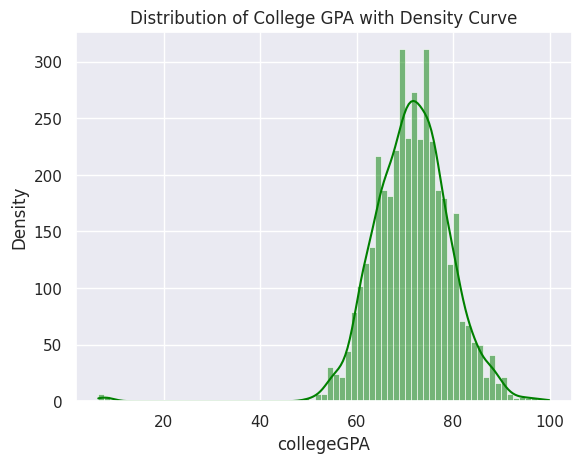

In [22]:
plt.title("Distribution of College GPA with Density Curve")
sns.histplot(df['collegeGPA'], kde=True, color="green")
plt.xlabel("collegeGPA")
plt.ylabel("Density")
plt.show();

Observations:
* The plot illustrates the distribution of employee GPAs, with most values falling between 65 and 75.
* The density curve (KDE) provides a smooth representation of the GPA distribution, highlighting whether the data is tightly clustered or spread out.
* A broader curve indicates greater variation in GPAs, while a narrower peak suggests less variation

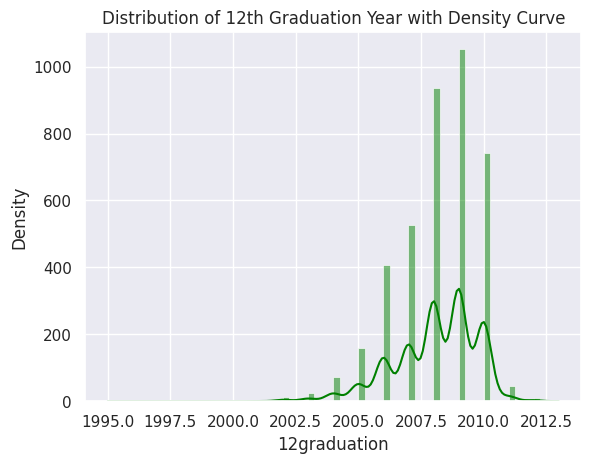

In [23]:
plt.title("Distribution of 12th Graduation Year with Density Curve")
sns.histplot(df['12graduation'], kde=True, color="green")
plt.xlabel('12graduation')
plt.ylabel('Density')
plt.show();

### observations:
- This plot shows how the 12th Graduation years are distributed among all employees
- Most employyes graduated in the year 2009

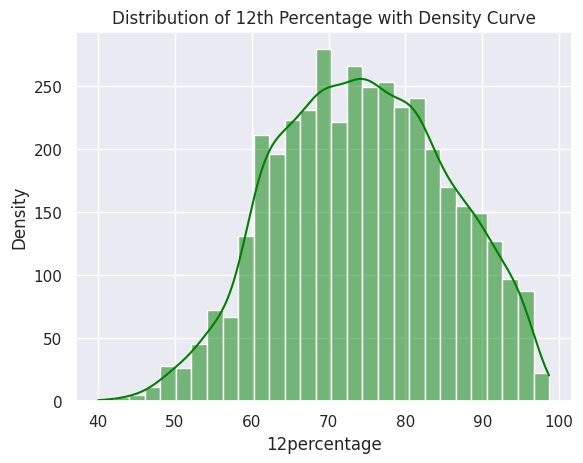

In [24]:
plt.title("Distribution of 12th Percentage with Density Curve")
sns.histplot(df['12percentage'], kde=True, color="green")
plt.xlabel('12percentage')
plt.ylabel('Density')
plt.show();

### observations:
- This plot shows how the 12th percenatge scores are distributed among all employees
- Most employees scored between 70 and 73 percent

## Histogram

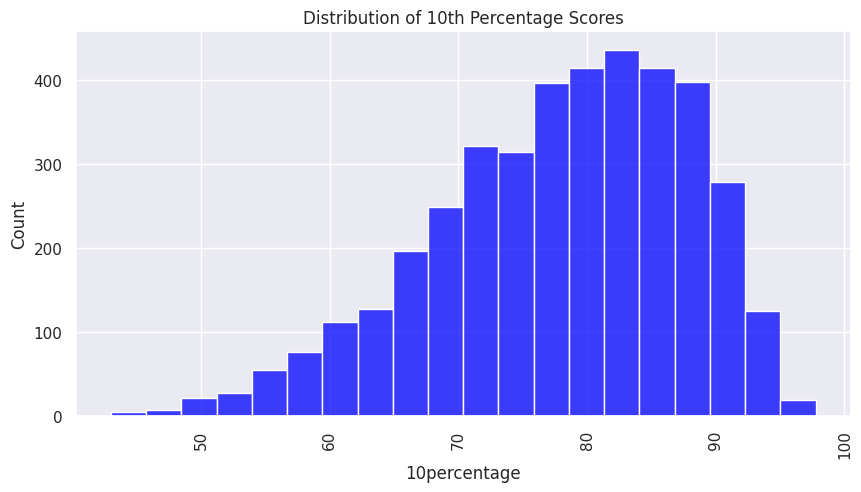

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Distribution of 10th Percentage Scores")
plt.xticks(rotation=90)
sns.histplot(data=df, x='10percentage', color='blue', bins=20, ax=ax)
plt.show();

### observations:
- This histogram shows the distribution of 10th percentage scores among all employees
- Most employees scored around 83 percent

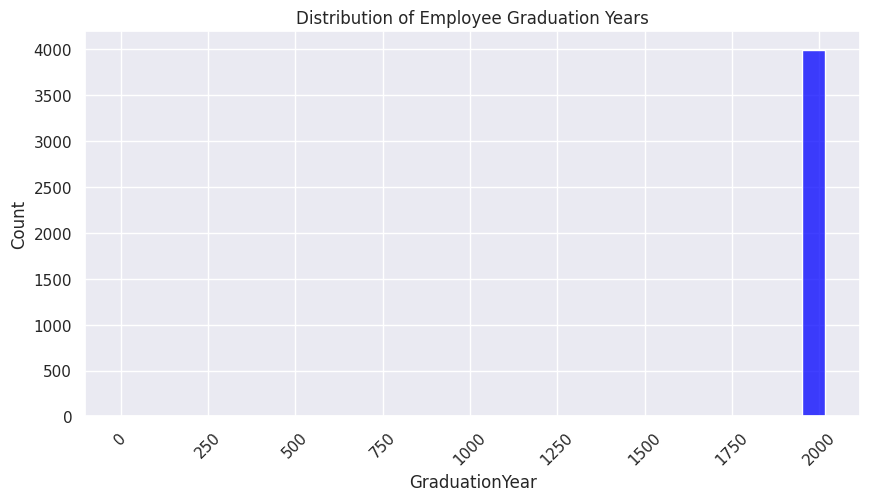

In [26]:
fig,ax=plt.subplots(figsize=(10,5))
plt.title("Distribution of Employee Graduation Years")
plt.xticks(rotation=45)
sns.histplot(data=df,x='GraduationYear',color='blue',bins=30,ax=ax)
plt.show();

### observations:
- This histogram shows the graduation year of employees.Most employees graduated in the year 2000

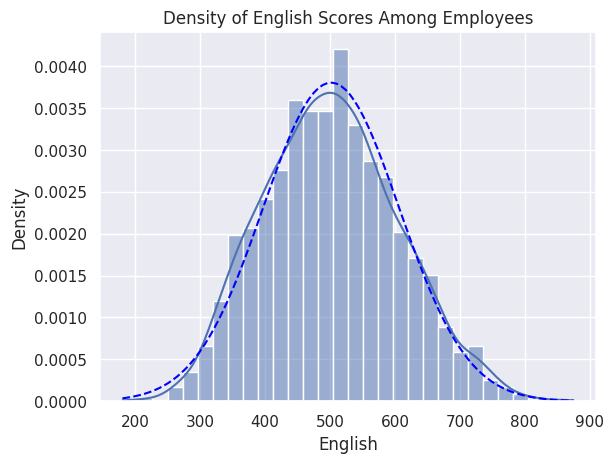

In [27]:
import scipy.stats as stats
plt.title("Density of English Scores Among Employees")
sns.histplot(data=df['English'], stat='density', bins=30, kde=True)
x = np.linspace(df['English'].min(), df['English'].max(), 100)
plt.plot(x, stats.norm.pdf(x, df['English'].mean(), df['English'].std()),
        color='blue', linestyle='dashed')
plt.show();

### observations:
- This plot illustrates the density of English scores.Most employees scored between 440 and 520

## Box Plot

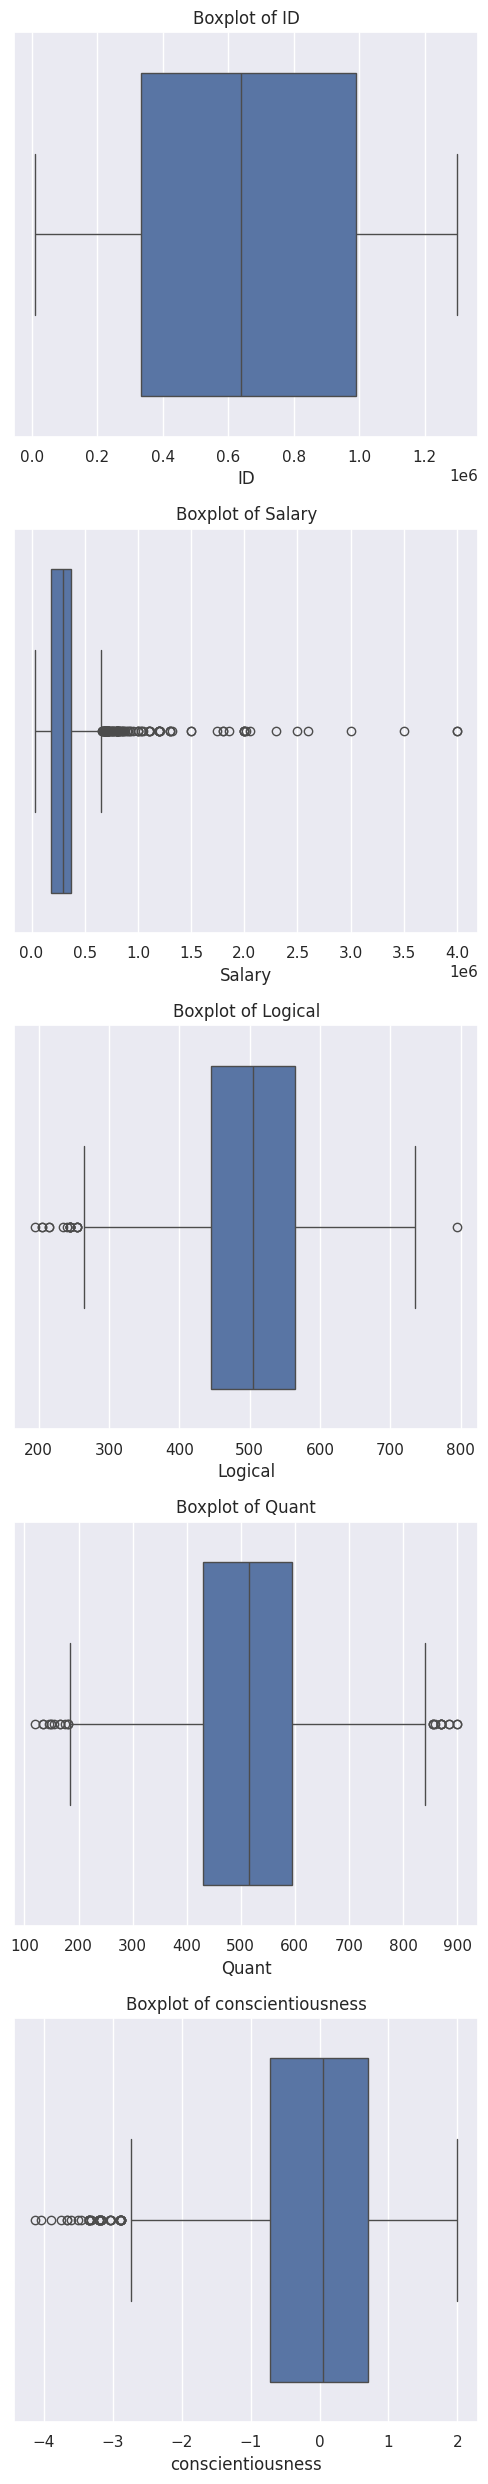

In [28]:
selected_columns = ['ID', 'Salary','Logical', 'Quant','conscientiousness']
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1,
                        figsize=(5,5*len(selected_columns)))
for i,column in enumerate(selected_columns):
    ax = axes[i]
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f"Boxplot of {column}")
plt.tight_layout()
plt.show();

Observation of Outliers
* The boxplots highlight the presence of outliers across various variables.
* The "ID" variable shows no outliers in the dataset.
* The "Salary" boxplot reveals outliers on the higher end, indicating a few extremely high salaries. This suggests the salary data is right-skewed.
* The "Logical" variable has an uneven distribution, with significantly more outliers on one side. The median is 505, the interquartile range (IQR) is 120, and the values range from a minimum of 195 to a maximum of 795.
* The "Quant" variable exhibits a balanced distribution, with outliers on both sides. It has a median of 515, an IQR of 165, and values ranging from 120 to 900.
* The "Conscientiousness" variable shows outliers on the lower end, indicating some low values. The distribution is left-skewed, with a long tail pulling the mean downward.

In [29]:
col_median = df['Logical'].median()
col_median

505.0

In [30]:
col_median = df['Quant'].median()
col_median

515.0

In [31]:
col_min = df['Logical'].min()
col_min

195

In [32]:
col_max = df['Logical'].max()
col_max

795

In [33]:
col_min = df['Quant'].min()
col_min

120

In [34]:
col_max = df['Quant'].max()
col_max

900

In [35]:
col_data = df['Logical']
Q1 = col_data.quantile(0.25)
Q3 = col_data.quantile(0.75)
col_iqr = Q3-Q1
print(f"The Interquartile Range (IQR) of 'logical' is: {col_iqr}")

The Interquartile Range (IQR) of 'logical' is: 120.0


In [36]:
col_data = df['Quant']
Q1 = col_data.quantile(0.25)
Q3 = col_data.quantile(0.75)
col_iqr = Q3-Q1
print(f"The Interquartile Range (IQR) of 'Quant' is: {col_iqr}")

The Interquartile Range (IQR) of 'Quant' is: 165.0


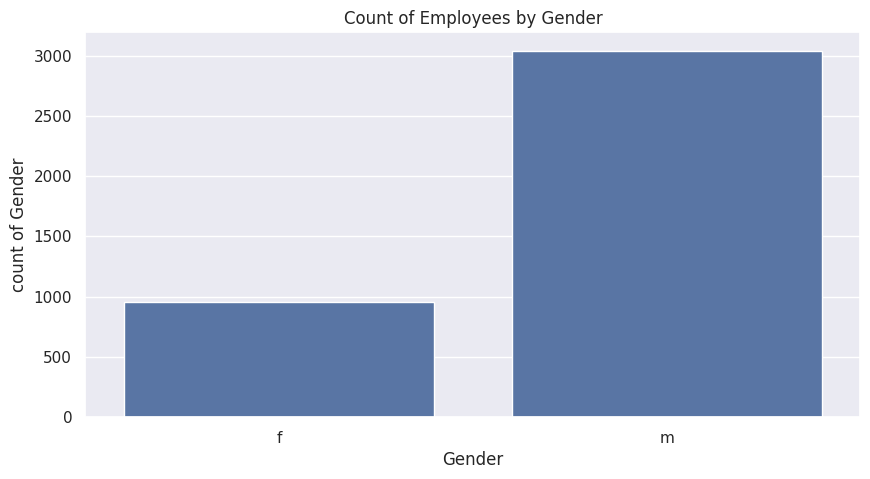

In [37]:
plt.figure(figsize=(10,5))
plt.title("Count of Employees by Gender")
sns.countplot(x='Gender', data=df)
plt.ylabel('count of Gender')
plt.xlabel('Gender')

plt.xticks(rotation=0)
plt.show();

### observations:
- This countplot shows the number of employees by gender.There are more male employees than female employees.

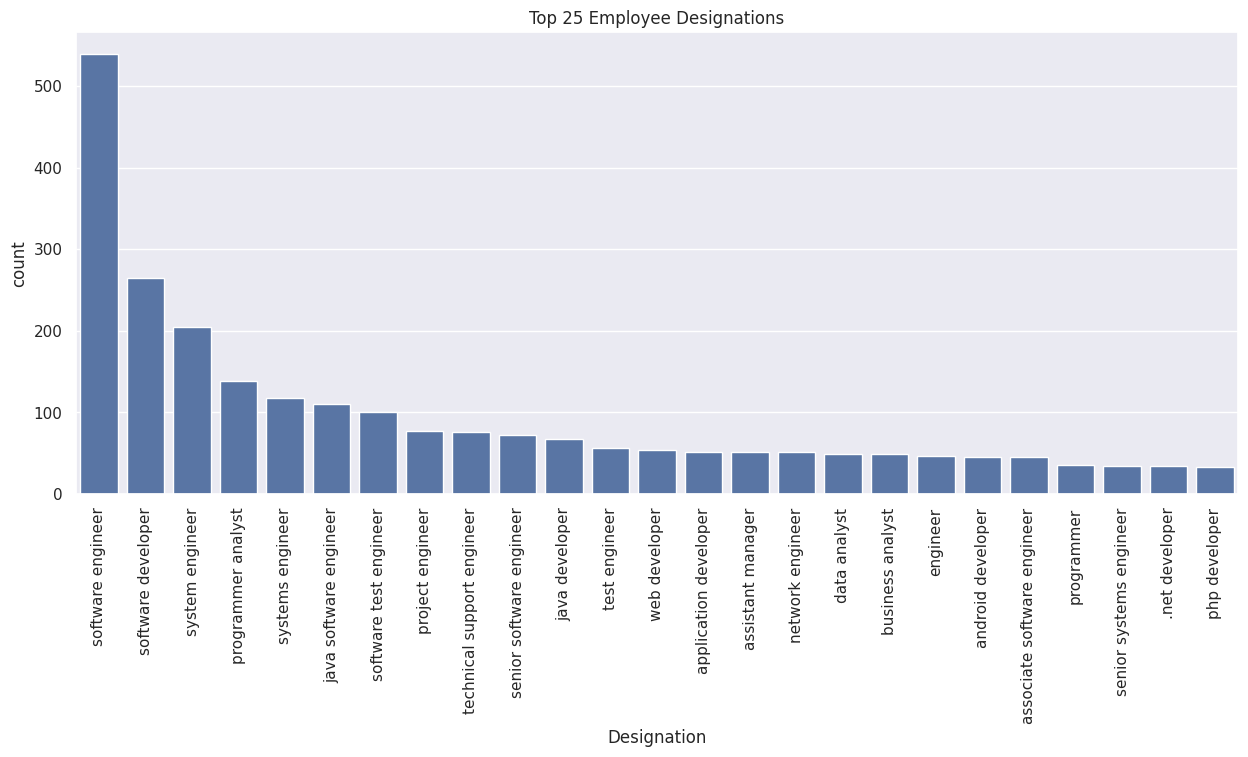

In [38]:
plt.figure(figsize=(15,6))
plt.title("Top 25 Employee Designations")
plt.xticks(rotation=90)
sns.countplot(data=df, x='Designation',
              order=df['Designation'].value_counts().index[:25])
plt.show();

### observations:
- This plot shows the designation of employees.Most employees are designated as software engineers,while the fewer hold the title of PHP developeer.

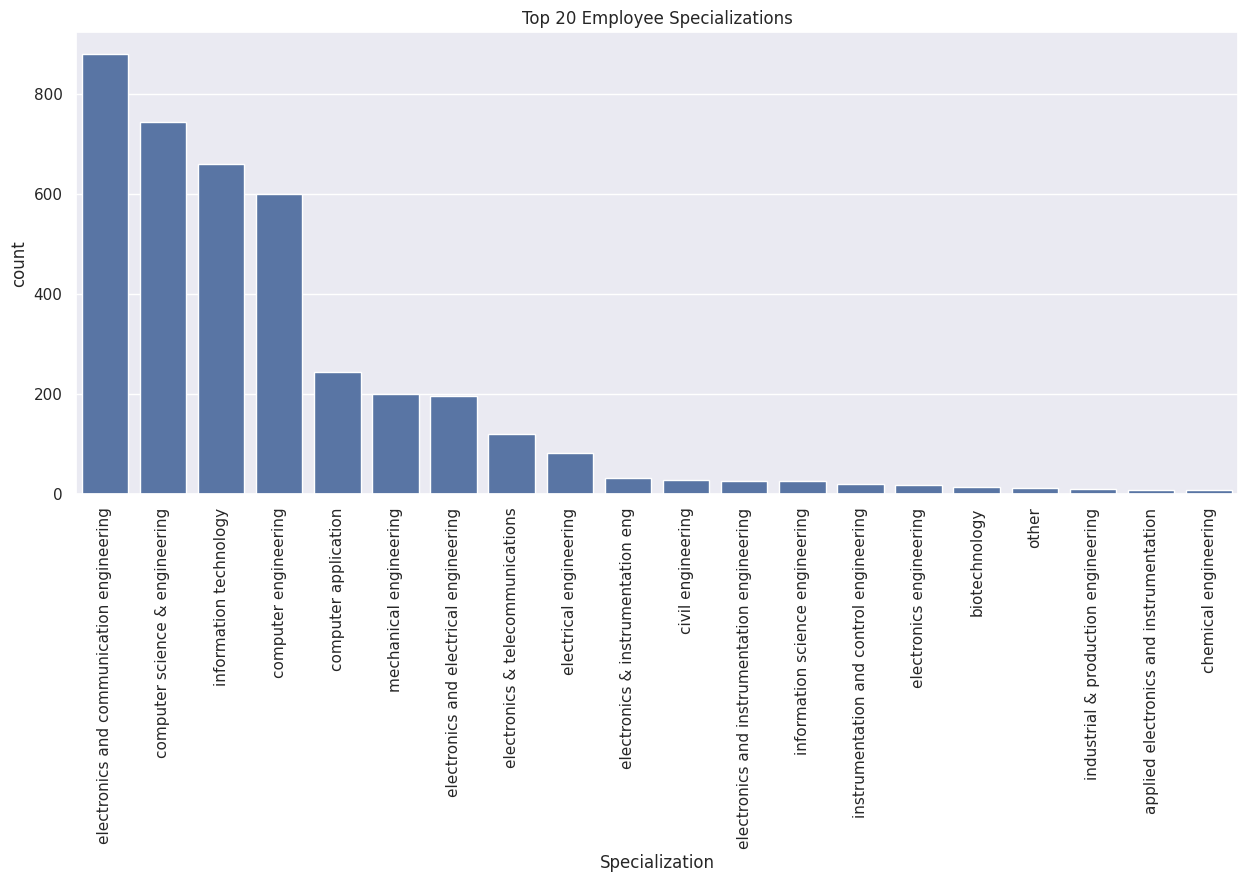

In [39]:
plt.figure(figsize=(15,6))
plt.title("Top 20 Employee Specializations")
plt.xticks(rotation=90)
sns.countplot(data=df, x='Specialization',
             order = df['Specialization'].value_counts().index[:20])
plt.show();

### observations:
- This plot displays the specialization of employees.The majority specialize in electronics and communication engineering,while the least number specialize in chemical engineering

In [40]:
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers_dict = {}
for col in df.select_dtypes(include=np.number).columns:
    outliers_dict[col] = detect_outliers(df[col])

print("Outliers:")
for col, outliers in outliers_dict.items():
    print(f"{col}: {outliers.sum()} outliers")

Outliers:
ID: 0 outliers
Salary: 109 outliers
10percentage: 30 outliers
12graduation: 45 outliers
12percentage: 1 outliers
CollegeID: 0 outliers
collegeGPA: 38 outliers
CollegeCityTier: 0 outliers
GraduationYear: 2 outliers
English: 15 outliers
Logical: 18 outliers
Quant: 25 outliers
ElectronicsAndSemicon: 2 outliers
ComputerScience: 902 outliers
MechanicalEngg: 235 outliers
conscientiousness: 39 outliers
agreeableness: 123 outliers
extraversion: 40 outliers
nueroticism: 15 outliers
openess_to_experience: 95 outliers


## Bivariate Analysis
#### Relationships between numerical columns
###### Analysis of numerical columns


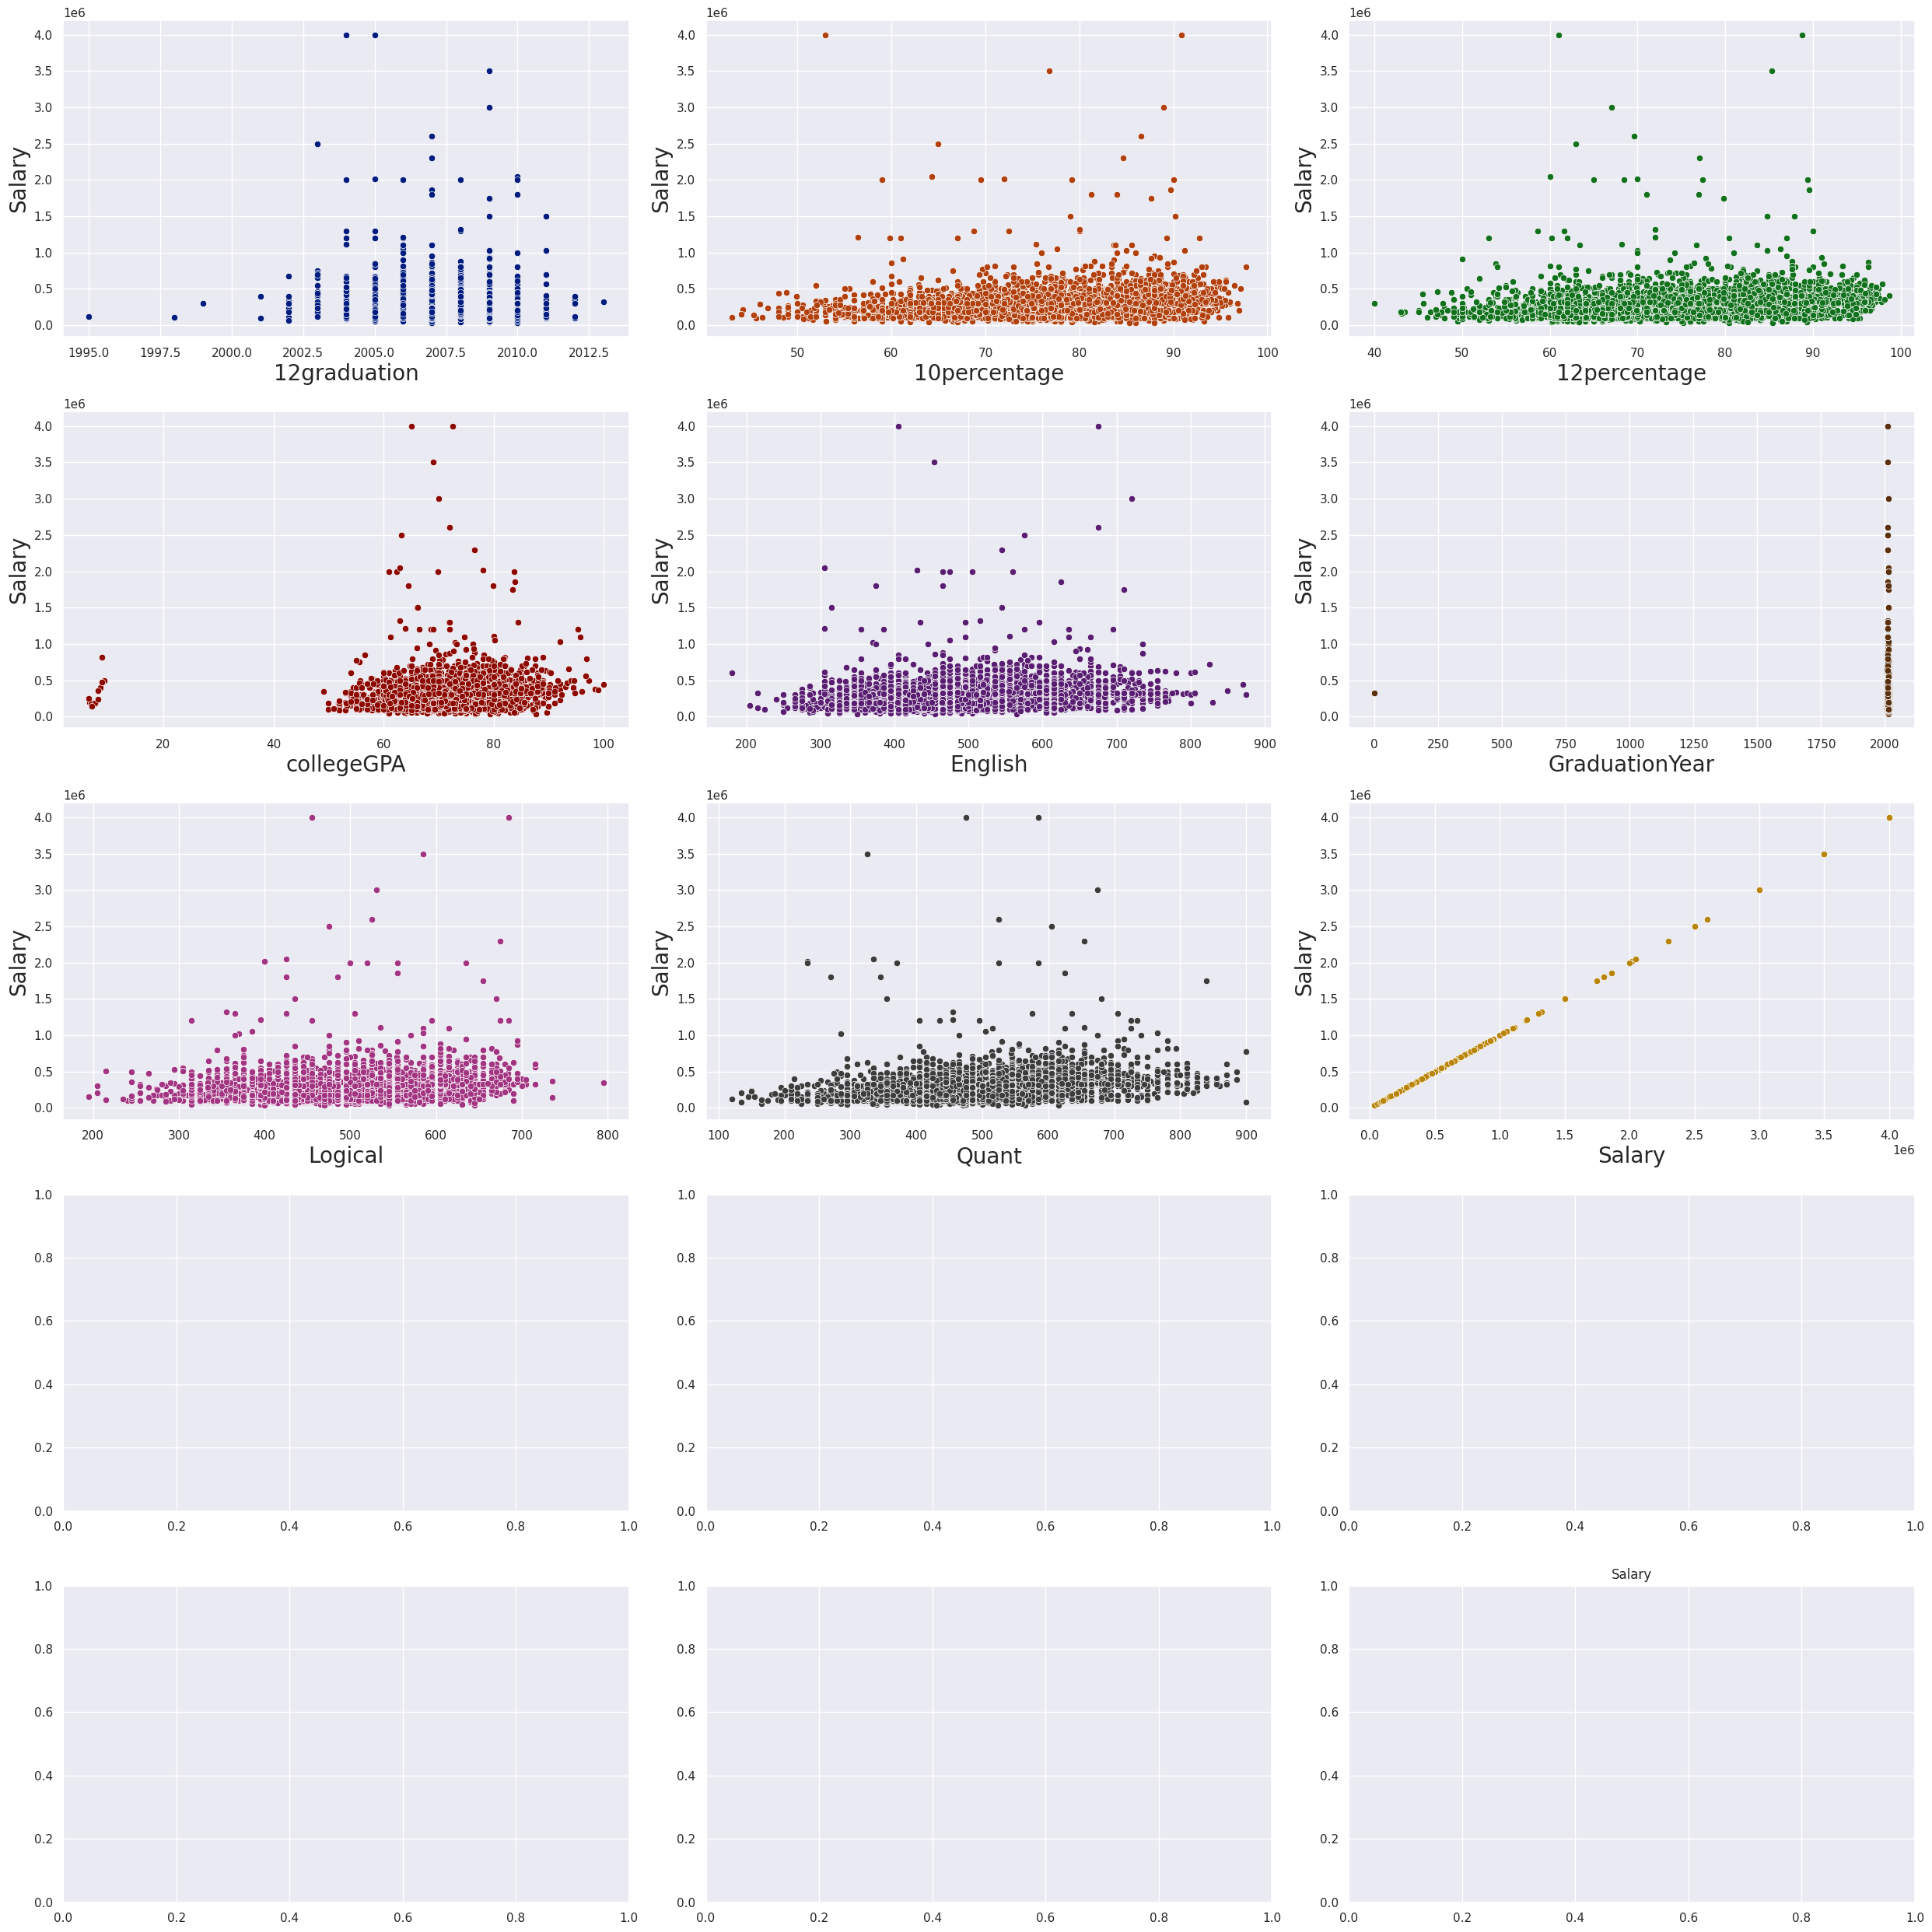

In [41]:
num_cols_3 = ['12graduation','10percentage','12percentage','collegeGPA','English',
             'GraduationYear','Logical','Quant','Salary']
num_rows = len(num_cols_3)//2 + len(num_cols_3)%2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25,25))

if num_rows == 1:
    axes = [axes]
colors = sns.color_palette('dark', len(num_cols_3))

for i, col_name in enumerate(num_cols_3):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=col_name,y='Salary',data=df,ax=axes[row][col],color=colors[i])
    plt.title(f"{col_name}")
    axes[row][col].set_xlabel(col_name,fontsize=20)
    axes[row][col].set_ylabel('Salary',fontsize=20)

plt.tight_layout()
plt.show();

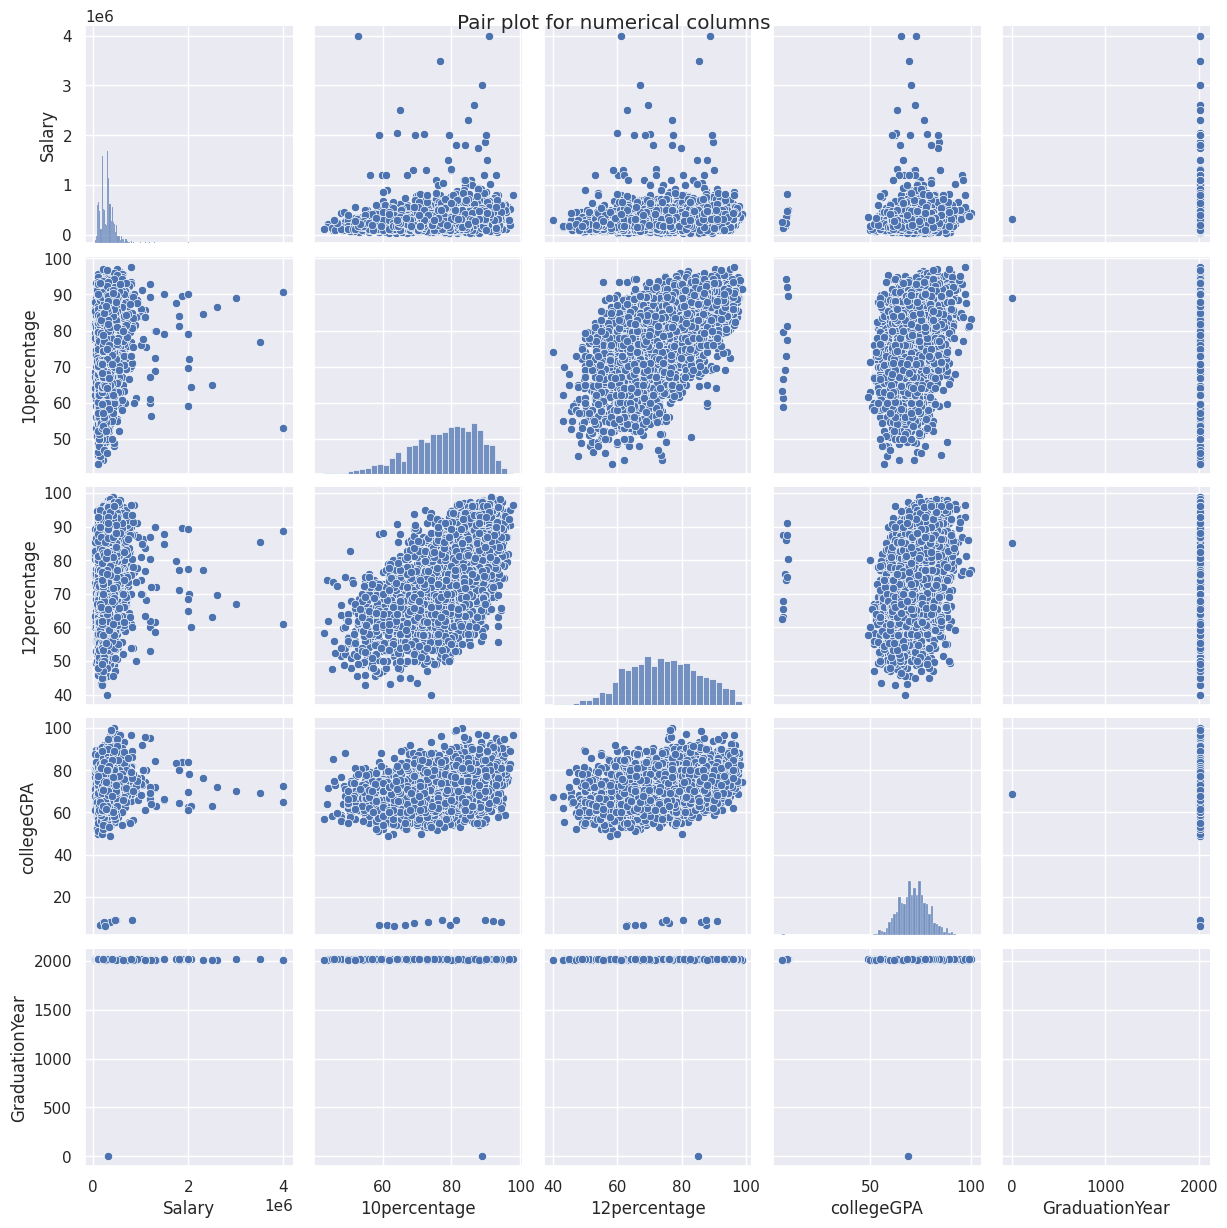

In [42]:
### Pair plots of numerical columns
numerical_columns = ['Salary','10percentage','12percentage','collegeGPA','GraduationYear']
sns.pairplot(data=df, vars=numerical_columns)
plt.suptitle("Pair plot for numerical columns")
plt.show();

### Patterns between categorical and numerical columns
### Swarmplot

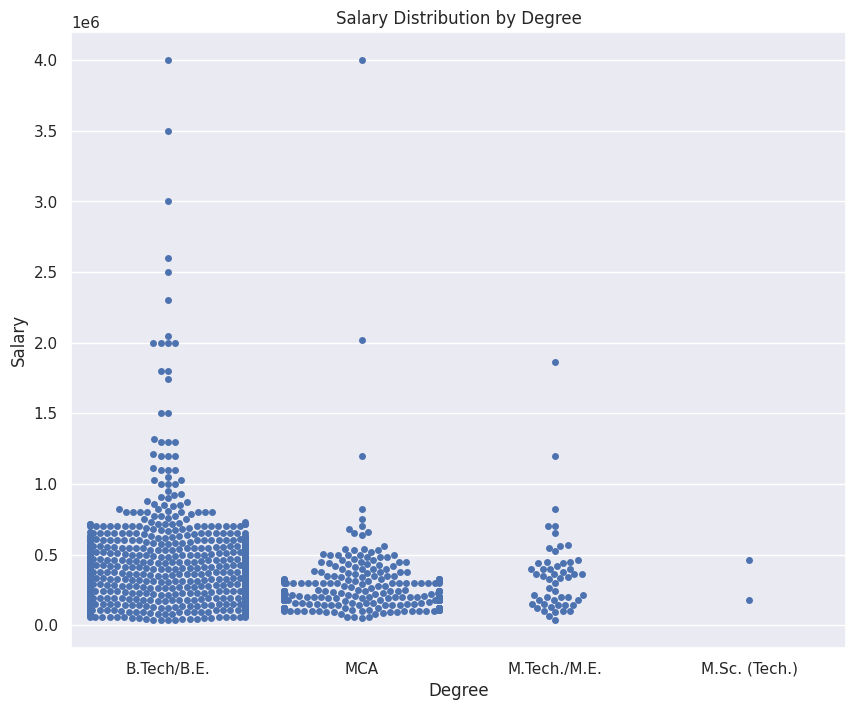

In [43]:
fig = plt.subplots(figsize=(10,8))
plt.title("Salary Distribution by Degree")
sns.swarmplot(data=df, x='Degree', y="Salary");

### observations:
- This swarmplot shows how different degrees relate to salary. Employees with a B.Tech/B.E background earn the most, while those with an M.Sc (Tech) earn the least.

### Boxplot

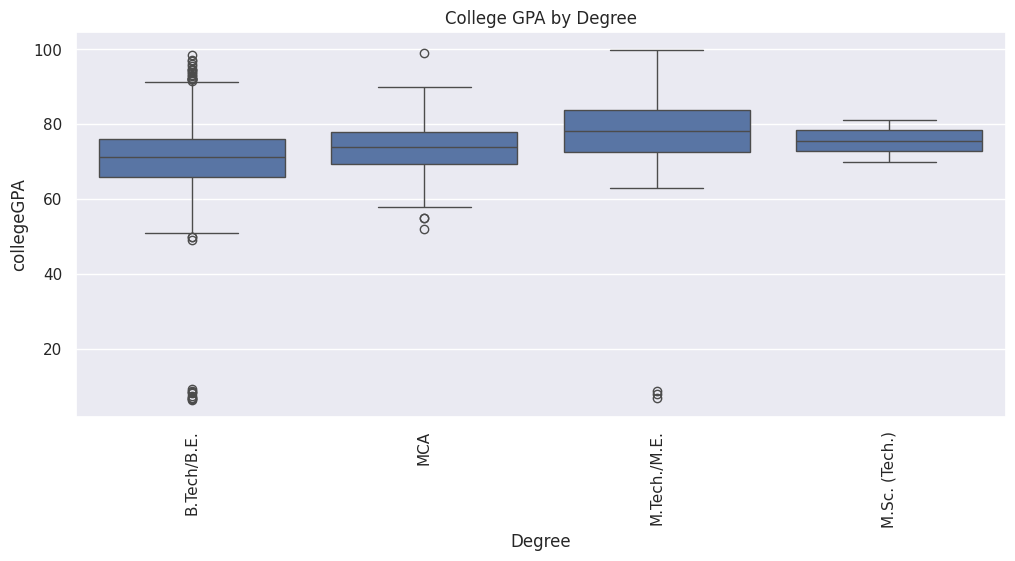

In [44]:
fig = plt.subplots(figsize=(12,5))
plt.title("College GPA by Degree")
sns.boxplot(data=df, x='Degree', y='collegeGPA')
plt.xticks(rotation=90)
plt.show();

In [ ]:
## Barplot
plt.figure(figsize=(10,5))
plt.title("Salary by Specialization (Top 20 Employees)")
sns.barplot(data=df.head(20), x = 'Specialization', y='Salary')
plt.xticks(rotation=90)
plt.show();

### observations:
- This barplot shows the average salary for each specialization among the top 20 employees.The height of each bar represents the estimated average salary for each specialization.

### Research Questions
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [45]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [46]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

#### Is there a relationship between gender and specialization?(i.e.Does the preference of specialization depend on the gender?)

In [47]:
cse_data =df[df['Degree'] == 'B.Tech/B.E']
job_roles=['Programming Analyst','Software Engineer','Hardware Engineer','Associate Engineer']
req_data = cse_data[cse_data['Designation'].isin(job_roles)]
salary_range =(250000,300000)
avg_sal=req_data['Salary'].mean()
if salary_range[0]<=avg_sal<=salary_range[1]:
    print('The claim is supported by the Data')
else:
    print('The claim is not supported by the Data')

The claim is not supported by the Data


In [48]:
from scipy import stats
contingency_table=pd.crosstab(df['Gender'],df['Designation'])

In [49]:
chi2_stats,p_val,dof,expected=stats.chi2_contingency(contingency_table)
alpha=0.05
if p_val<=alpha:
    print('There is a significant relationship between gender and specialization preference')
else:
    print('There is no significant relationship between gender and specialization preference')

There is a significant relationship between gender and specialization preference


- The claim that computer science and engineering graduates typically earn between 2.5 to 3 lakhs in certain job roles isn't backed up by the data. Also, based on the statistical test, there isn’t a meaningful link between gender and specialization choice among graduates in the AMCAT dataset.

### Conclusion:
### Simplified Observations:
- The claim that computer science and engineering graduates typically earn between 2.5 to 3 lakhs in certain job roles isn't backed up by the data. Also, based on the statistical test, there isn’t a meaningful link between gender and specialization choice among graduates in the AMCAT dataset.

---

### Simplified Conclusion:
- The dataset provides information on the employment outcomes of engineering graduates (such as salary, job titles, and job locations), along with standardized scores in three areas: cognitive skills, technical skills, and personality traits.
- The dataset has 4000 rows and 40 columns, but there are many duplicate entries. First, we need to clean the data by removing unnecessary rows and columns, then check for any missing values before moving to visualizations.
- We performed univariate analysis using plots like PDFs, histograms, boxplots, and count plots. In this analysis, we found outliers in each numerical column and observed the probability and frequency distribution of both numerical and categorical variables, providing insights after each plot.
- We also conducted bivariate analysis to explore relationships between variables. We used scatter plots, hexbin plots, and pair plots for numerical columns, and swarm plots, boxplots, and bar plots to find patterns between categorical and numerical columns.
- Most candidates are male, from Computer Science (CS) and Electrical Engineering (EE), and they work in IT, mainly in Mumbai and Bangalore, with an average salary of 3 LPA.
- Most female candidates prefer CS, EE, and IT fields, avoiding mechanical and civil engineering, and they also work in IT with an average salary of 2.9 LPA.
- Software Engineer and Software Developer are the most common job titles, while Senior Software Engineer and Assistant Manager roles come with the highest salary packages.